<a href="https://colab.research.google.com/github/nubialmeida/Projeto-Looker/blob/main/Projetos_tratando_dados_looker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Instalação de bibliotecas

In [ ]:
pip install gcsfs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pandera

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Instalação de bibliotecas

In [ ]:
import pandas as pd
import os
import numpy as np
from google.cloud import storage
import pandera as pa

##Configuração Pandas

In [ ]:
pd.set_option('display.max_columns',100)

###Configurações Google Cloud Storage

In [ ]:

#client = storage.Client()
#bucket = client.get_bucket('thiagoperal')
#bucket.blob('.csv')
path1 = '/content/PlanilhaVendas - Sales_April_2019.csv'
path2 = '/content/dados_atendimento - atendimentos.csv'

In [ ]:
df1 = pd.read_csv(path1,sep=',')
df2 = pd.read_csv(path2,sep=',')

In [ ]:
df1.tail(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
17485,194090,Google Phone,1,600,04/08/19 17:11,NaN,"177 Jackson St, Los Angeles, CA 90001"
17486,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,NaN,"311 Forest St, Austin, TX 73301"
17487,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,NaN,"347 Sunset St, San Francisco, CA 94016"
17488,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,NaN,"835 Lake St, Portland, OR 97035"
17489,194094,Lightning Charging Cable,1,14.95,04/18/19 11:08,NaN,"354 North St, Boston, MA 02215"


In [ ]:
df1.iloc[620:631]

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
620,NaN,NaN,NaN,NaN,NaN,NaN,NaN
621,NaN,NaN,NaN,NaN,NaN,NaN,NaN
622,NaN,NaN,NaN,NaN,NaN,NaN,NaN
623,NaN,NaN,NaN,NaN,NaN,NaN,NaN
624,178000,Lightning Charging Cable,1,14.95,04/27/19 11:47,NaN,"979 Hickory St, Los Angeles, CA 90001"
625,178001,USB-C Charging Cable,1,11.95,04/05/19 10:50,NaN,"976 Park St, New York City, NY 10001"
626,178002,USB-C Charging Cable,1,11.95,04/13/19 17:17,NaN,"746 Willow St, Los Angeles, CA 90001"
627,178003,iPhone,1,700,04/04/19 18:52,NaN,"824 11th St, San Francisco, CA 94016"
628,178004,AA Batteries (4-pack),2,3.84,04/12/19 19:10,NaN,"372 Spruce St, Los Angeles, CA 90001"
629,178005,USB-C Charging Cable,1,11.95,04/07/19 12:02,NaN,"183 Cherry St, San Francisco, CA 94016"


In [ ]:
df1.dtypes

Unnamed: 0    object
Unnamed: 1    object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
Unnamed: 5    object
Unnamed: 6    object
dtype: object

In [ ]:
df1.drop(['Unnamed: 0','Unnamed: 5'],axis=1,inplace=True); # dropando as colunas 

In [ ]:
df1 = df1.drop(index=range(0, 624)) #dropei as linhas do inicio que estavam vazias

In [ ]:
df1.rename(columns={'Unnamed: 1':'Item','Unnamed: 2':'Quantity','Unnamed: 3':'Price','Unnamed: 4':'Date', 'Unnamed: 6': 'Adress'},inplace=True)
# renomeando as colunas

In [ ]:
df1.head(2)

,Item,Quantity,Price,Date,Adress
624,Lightning Charging Cable,1,14.95,04/27/19 11:47,"979 Hickory St, Los Angeles, CA 90001"
625,USB-C Charging Cable,1,11.95,04/05/19 10:50,"976 Park St, New York City, NY 10001"


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16866 entries, 624 to 17489
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Item      16813 non-null  object
 1   Quantity  16813 non-null  object
 2   Price     16813 non-null  object
 3   Date      16813 non-null  object
 4   Adress    16813 non-null  object
dtypes: object(5)
memory usage: 659.0+ KB


In [ ]:
pd.unique(df1['Item'])

array(['Lightning Charging Cable', 'USB-C Charging Cable', 'iPhone',
       'AA Batteries (4-pack)', 'Bose SoundSport Headphones',
       '34in Ultrawide Monitor', 'Wired Headphones',
       'AAA Batteries (4-pack)', 'Macbook Pro Laptop',
       'Apple Airpods Headphones', 'Flatscreen TV', 'Google Phone',
       '20in Monitor', '27in 4K Gaming Monitor', '27in FHD Monitor',
       'ThinkPad Laptop', 'LG Dryer', 'Vareebadd Phone',
       'LG Washing Machine', nan, 'Product'], dtype=object)

In [ ]:
df1.loc[df1['Item'] == 'Product'] # localizando as linha que aparecem product

,Item,Quantity,Price,Date,Adress
1985,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2000,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2143,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2316,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2725,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3245,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3752,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3901,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
4410,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
6046,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [ ]:
df1.rename(columns={'Item':'Product','Quantity':'Quantity Ordered','Price':'Price Each','Date':'Order Date', 'Adress':'Purchase Address'},inplace=True)


In [ ]:
rows_to_drop = df1.loc[df1['Product'] == 'Product'] #dropei todas as linhas que tinham esses nomes

In [ ]:
df1 = df1.drop(index=rows_to_drop.index) #dropei essas linhas

In [ ]:
df1.head(2)

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
624,Lightning Charging Cable,1,14.95,04/27/19 11:47,"979 Hickory St, Los Angeles, CA 90001"
625,USB-C Charging Cable,1,11.95,04/05/19 10:50,"976 Park St, New York City, NY 10001"


In [ ]:
pd.unique(df1['Product'])

array(['Lightning Charging Cable', 'USB-C Charging Cable', 'iPhone',
       'AA Batteries (4-pack)', 'Bose SoundSport Headphones',
       '34in Ultrawide Monitor', 'Wired Headphones',
       'AAA Batteries (4-pack)', 'Macbook Pro Laptop',
       'Apple Airpods Headphones', 'Flatscreen TV', 'Google Phone',
       '20in Monitor', '27in 4K Gaming Monitor', '27in FHD Monitor',
       'ThinkPad Laptop', 'LG Dryer', 'Vareebadd Phone',
       'LG Washing Machine', nan], dtype=object)

In [ ]:
df1.isna().sum() # 53 linhas que são "nan"

Product             53
Quantity Ordered    53
Price Each          53
Order Date          53
Purchase Address    53
dtype: int64

In [ ]:
df1.drop(index=df1.isna().index) #mostrando os 53 valores nulos

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [ ]:
pd.unique(df1['Product'])

array(['Lightning Charging Cable', 'USB-C Charging Cable', 'iPhone',
       'AA Batteries (4-pack)', 'Bose SoundSport Headphones',
       '34in Ultrawide Monitor', 'Wired Headphones',
       'AAA Batteries (4-pack)', 'Macbook Pro Laptop',
       'Apple Airpods Headphones', 'Flatscreen TV', 'Google Phone',
       '20in Monitor', '27in 4K Gaming Monitor', '27in FHD Monitor',
       'ThinkPad Laptop', 'LG Dryer', 'Vareebadd Phone',
       'LG Washing Machine', nan], dtype=object)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16834 entries, 624 to 17489
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product           16781 non-null  object
 1   Quantity Ordered  16781 non-null  object
 2   Price Each        16781 non-null  object
 3   Order Date        16781 non-null  object
 4   Purchase Address  16781 non-null  object
dtypes: object(5)
memory usage: 1.3+ MB


In [ ]:
df1.dropna() #Dropando nulos do df1

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
624,Lightning Charging Cable,1,14.95,04/27/19 11:47,"979 Hickory St, Los Angeles, CA 90001"
625,USB-C Charging Cable,1,11.95,04/05/19 10:50,"976 Park St, New York City, NY 10001"
626,USB-C Charging Cable,1,11.95,04/13/19 17:17,"746 Willow St, Los Angeles, CA 90001"
627,iPhone,1,700,04/04/19 18:52,"824 11th St, San Francisco, CA 94016"
628,AA Batteries (4-pack),2,3.84,04/12/19 19:10,"372 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...
17485,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001"
17486,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301"
17487,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016"
17488,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035"


In [ ]:
pd.unique(df1['Product'])

array(['Lightning Charging Cable', 'USB-C Charging Cable', 'iPhone',
       'AA Batteries (4-pack)', 'Bose SoundSport Headphones',
       '34in Ultrawide Monitor', 'Wired Headphones',
       'AAA Batteries (4-pack)', 'Macbook Pro Laptop',
       'Apple Airpods Headphones', 'Flatscreen TV', 'Google Phone',
       '20in Monitor', '27in 4K Gaming Monitor', '27in FHD Monitor',
       'ThinkPad Laptop', 'LG Dryer', 'Vareebadd Phone',
       'LG Washing Machine', nan], dtype=object)

In [ ]:
df1['Order Date'] = df1['Order Date'].astype(str)
df1['Product'] = df1['Product'].astype(str)
df1['Price Each'] = df1['Price Each'].astype(float)
#df1['Quantity Ordered'] = df1['Quantity Ordered'].astype(int)
df1['Purchase Address'] = df1['Purchase Address'].astype(str)


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16834 entries, 624 to 17489
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product           16834 non-null  object 
 1   Quantity Ordered  16781 non-null  object 
 2   Price Each        16781 non-null  float64
 3   Order Date        16834 non-null  object 
 4   Purchase Address  16834 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.3+ MB


##Conclusão Final

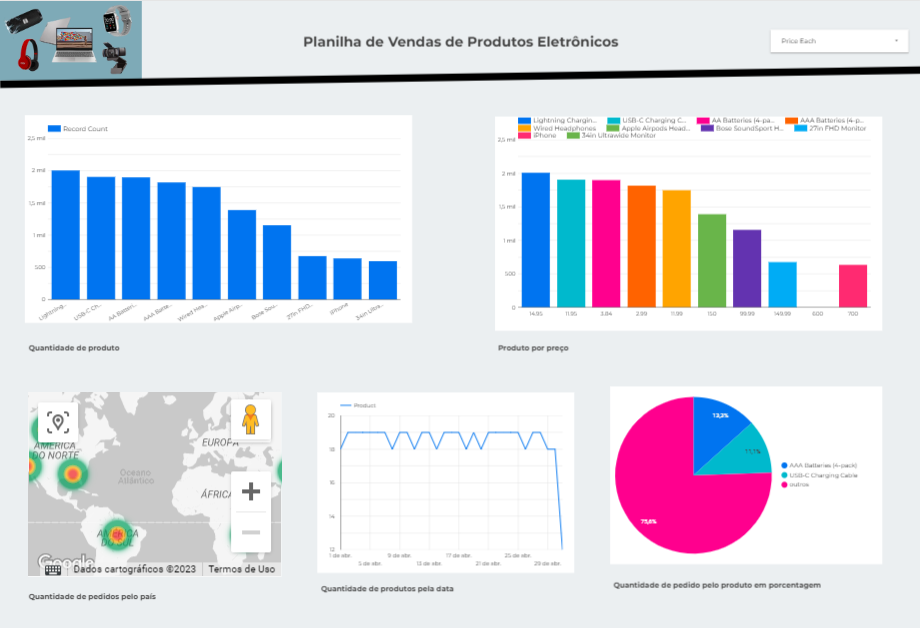

- Os cabos de energia são os produtos que lideram em vendas
- A América do Norte é a que lidera como a região que possuem mais pedidos, possuindo 3 dos 6 principais focos
- 1/4 de todas as compras globais são de pilhas e cabos usb
- No mês em questão, a quantidade de pedidos se manteve estável 

##Analisando o dataframe 2

In [ ]:
df2.head(3)

,Call Id,Data,Atendente,Área,Respondido - Resolvido (S/N),Velocidade de Resposta,Duracao Chamada,Duracao com atendente em Segundos,Índice de Satisfacao
0,ID0001,43912,João D.,Vendas,Sim - S,109,00:02:23,143,2
1,ID0002,43907,Marcelo F.,RECLAMAÇÕES,Sim - N,70,00:04:02,242,3
2,ID0003,43908,Leandro C.,Vendas,Sim - S,10,00:02:11,131,3


In [ ]:
df2.tail(3)

,Call Id,Data,Atendente,Área,Respondido - Resolvido (S/N),Velocidade de Resposta,Duracao Chamada,Duracao com atendente em Segundos,Índice de Satisfacao
1006,ID1766,43910,Gustavo M.,Vendas,Sim - S,49,00:01:58,118,5
1007,ID1770,43894,Ana S.,Cancelametos,Sim - S,78,00:01:02,62,4
1008,ID1772,43916,Leandro C.,RECLAMAÇÕES,Sim - S,121,00:06:01,361,2


In [ ]:
# Converte a coluna de data serial em um objeto DateTime
df2['Data'] = pd.to_datetime(df2['Data'], unit='D', origin='1899-12-30')

# Formata a data no estilo 'dia/mês/ano'
df2['Data'] = df2['Data'].dt.strftime('%d/%m/%Y')

In [ ]:
df2.head(3)

,Call Id,Data,Atendente,Área,Respondido - Resolvido (S/N),Velocidade de Resposta,Duracao Chamada,Duracao com atendente em Segundos,Índice de Satisfacao
0,ID0001,22/03/2020,João D.,Vendas,Sim - S,109,00:02:23,143,2
1,ID0002,17/03/2020,Marcelo F.,RECLAMAÇÕES,Sim - N,70,00:04:02,242,3
2,ID0003,18/03/2020,Leandro C.,Vendas,Sim - S,10,00:02:11,131,3


In [ ]:
df2.to_csv('dados_atendimento - atendimentos_tratado.csv',index=False)

In [ ]:
df1.isna().sum ()

Product              0
Quantity Ordered    53
Price Each          53
Order Date           0
Purchase Address     0
dtype: int64

##Conclusão Final


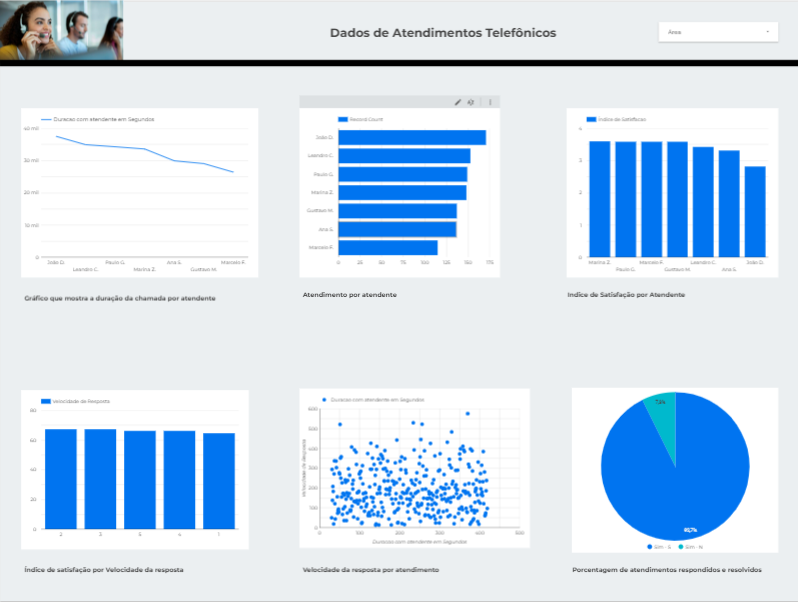

- Nesse segundo dataframe, mostra dados de atendimentos, no qual em geral, o João é quem mais faz atendimento e tem menor nota de satisfação mas ele é quem mais vende, estando em 3º lugar em quem atende mais rápido no setor de cancelamentos  estando em 2º lugar no indice de satisfação, e mais atende reclamações sendo nesse setor o 1 lugar no indice de satisfação
- Quem atende mais cancelamentos é o Leandro, seus atendimentos são mais longos e sua média de satisfação está um pouco abaixo em relação aos outros atendentes mas como se trata do setor de cancelamentos, é previsto que isso ocorra
- Os atendimentos costumam ser por 3 min, e quando  e 92,7% são resolvidos